In [1]:
from IPython.display import Image, display

In [2]:
!rm -f $(find examples/segmentation -name 'data.dill.gz')
!rm -f $(find examples/segmentation -name '.task.json')
!rm -f $(find examples/segmentation -name '.sha.json')

In [3]:
%cat examples/segmentation/task.yml

runnable: true

pipeline:
  - tests.test_repype.Download
  - tests.test_repype.Unzip
  - tests.test_repype.Segmentation
  - tests.test_repype.Output

config:
  download:
    url: https://zenodo.org/record/3362976/files/B2.zip

scopes:
  segmentation: 'seg/%s.png'

inputs:
  - B2--W00026--P00001--Z00000--T00000--dapi.tif

In [4]:
%cat examples/segmentation/sigma=2/task.yml

config:
  segmentation:
    sigma: 2

In [5]:
!command python -m repype.cli examples/segmentation


2 task(s) selected for running
DRY RUN: use "--run" to run the tasks instead


In [6]:
!command python -m repype.cli examples/segmentation --run


2 task(s) selected for running
  
  (1/2) Entering task: /Users/void/Documents/pypers/examples/segmentation
  Starting from scratch
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅
  
  (2/2) Entering task: /Users/void/Documents/pypers/examples/segmentation/sigma=2
  Picking up from: /Users/void/Documents/pypers/examples/segmentation (segmentation)
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅


In [7]:
!command python -m repype.cli examples/segmentation


0 task(s) selected for running
DRY RUN: use "--run" to run the tasks instead


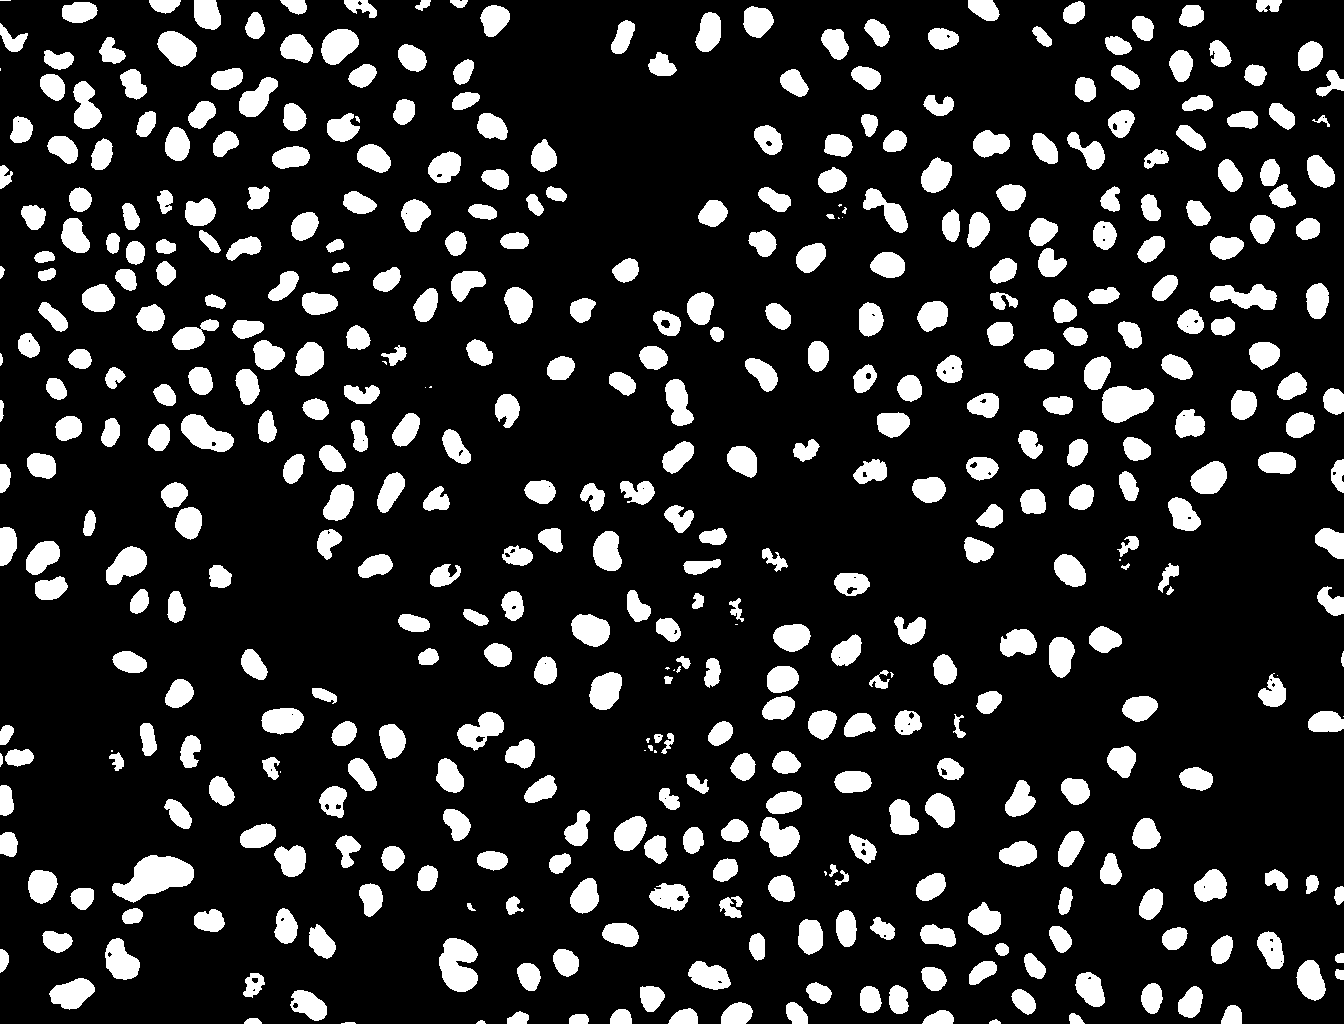

In [8]:
display(Image(filename = 'examples/segmentation/seg/B2--W00026--P00001--Z00000--T00000--dapi.tif.png'))

In [9]:
import repype.stage

class Segmentation(repype.stage.Stage):
     
    inputs = ['image']
    outputs = ['segmentation']

    def process(self, image, pipeline, config, status = None):
        import skimage
        image = skimage.filters.gaussian(image, sigma = config.get('sigma', 1.))
        threshold = skimage.filters.threshold_li(image)
        return dict(
            segmentation = skimage.util.img_as_ubyte(image > threshold)
        )

In [10]:
import repype.task

class Task(repype.task.Task):

    def create_pipeline(self, *args, **kwargs):
        pipeline = super().create_pipeline(*args, **kwargs)
        pipeline.stages[pipeline.find('segmentation')] = Segmentation()
        return pipeline

In [11]:
import repype.cli

main = repype.cli.main('examples/segmentation', run = True, task_cls = Task, tasks=['examples/segmentation'])
await main();


1 task(s) selected for running
  
  (1/1) Entering task: /Users/void/Documents/pypers/examples/segmentation
  Picking up from: /Users/void/Documents/pypers/examples/segmentation (segmentation)
    
    (1/1) Processing input: B2--W00026--P00001--Z00000--T00000--dapi.tif
                                
  Results have been stored ✅


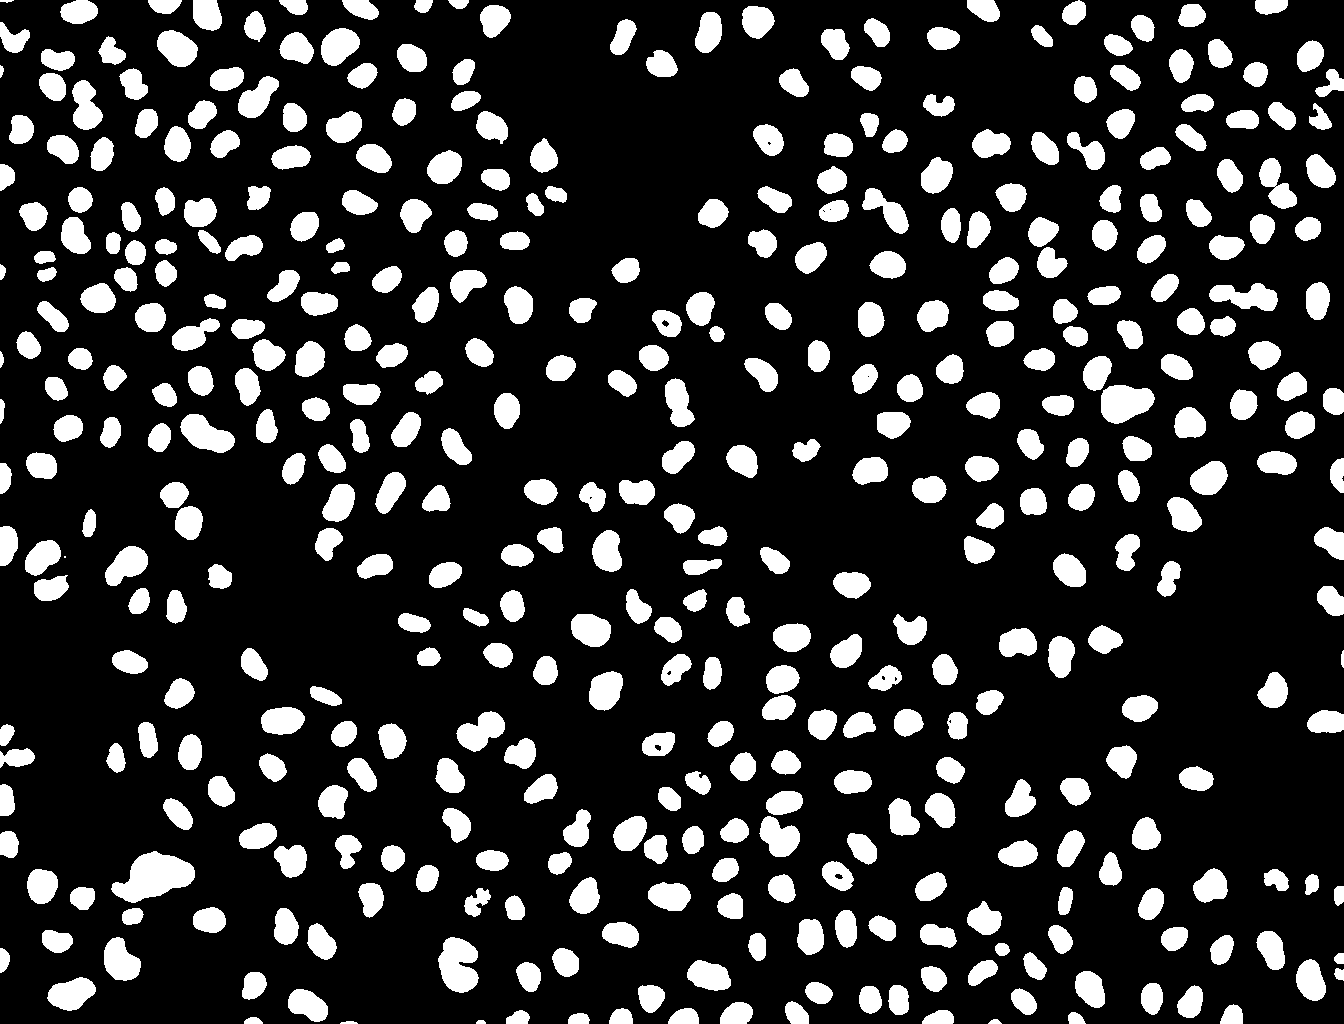

In [12]:
display(Image(filename = 'examples/segmentation/seg/B2--W00026--P00001--Z00000--T00000--dapi.tif.png'))

TODO: Run batch programmatically, update run contexts to change pipeline/hyperparameters